In [5]:
####################################################################
###    This is the PYTHON version of program 7.1 from page 241 of  #
### "Modeling Infectious Disease in humans and animals"            #
### by Keeling & Rohani.										   #
###																   #
### It is the SIR epidemic in a metapopulation with "animal-like"  #
### movements of infected or susceptible individuals across the    #
### network.                                                       #
###																   #
### The default model employs global coupling between ALL          #
### subpopulations                                                 #
####################################################################

In [6]:
import scipy.integrate as spi
import numpy as np
import pylab as pl

*n is the number of sub-populations. Note that all parameters are vectors of size n, or matrices of size n × n

*βi	is the transmission rate for each subpopulation; β is a vector of length n

*γi	is called the removal or recovery rate for each subpopulation; γ is a vector of length n

*νi	is the total birth rate for each subpopulation; ν is a vector of length n

*μi	is the per capita death rate for each subpopulation; μ is a vector of length n

*mij	is the rate at which hosts migrate to subpopulation i from subpopulation j. m is a matrix of size n × n.

*Xi(0)	is the initial number or density of susceptible individuals in each subpopulation; X(0) is a vector of length n.

Yi(0)	is the initial number or density of infectious individuals in each subpopulation; Y(0) is a vector of length n.

In [7]:
n=5;
beta=1.0*np.ones(n);
gamma=0.1*np.ones(n);
nu=0.0001*np.ones(n);
mu=0.0001*np.ones(n);
X0=0.1*np.ones(n);
Y0=0.0*np.ones(n); Y0[0]=0.0001;
m=0.001*np.ones((n,n)); m=m-np.diag(np.diag(m));
ND=MaxTime=2910.0;
TS=1.0

INPUT=np.hstack((X0,Y0))

In [8]:
def diff_eqs(INP,t):  
	'''The main set of equations'''
	Y=np.zeros((2*n))
	V = INP   
	for i in range(n):
		Y[i] = nu[i] - beta[i]*V[i]*V[n+i] - mu[i]*V[i]; 
		Y[n+i] = beta[i]*V[i]*V[n+i] - mu[i]*V[n+i] - gamma[i]*V[n+i]
		for j in range(n):
			Y[i]+=m[i][j]*V[j] - m[j][i]*V[i];
			Y[n+i]+=m[i][j]*V[n+j] - m[j][i]*V[n+i];
	return Y   # For odeint

In [9]:
t_start = 0.0; t_end = ND; t_inc = TS
t_range = np.arange(t_start, t_end+t_inc, t_inc)
RES = spi.odeint(diff_eqs,INPUT,t_range)

print(RES)


[[1.00000000e-01 1.00000000e-01 1.00000000e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.00080032e-01 1.00089986e-01 1.00089986e-01 ... 9.97487007e-08
  9.97487007e-08 9.97487007e-08]
 [1.00160128e-01 1.00179942e-01 1.00179942e-01 ... 1.99005302e-07
  1.99005302e-07 1.99005302e-07]
 ...
 [1.01229118e-01 1.01229112e-01 1.01229112e-01 ... 4.63859360e-04
  4.63859360e-04 4.63859360e-04]
 [1.01272000e-01 1.01271994e-01 1.01271994e-01 ... 4.64393260e-04
  4.64393260e-04 4.64393260e-04]
 [1.01314803e-01 1.01314797e-01 1.01314797e-01 ... 4.64947697e-04
  4.64947697e-04 4.64947697e-04]]


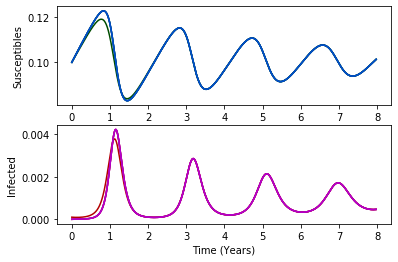

In [10]:
#Ploting
pl.subplot(211)
for i in range(n):
	pl.plot(t_range/365.0, RES[:,i], color=(0.0,0.3,i/5))
pl.xlabel('Time (Years)')
pl.ylabel('Susceptibles')
pl.subplot(212)
for i in range(n):
	pl.plot(t_range/365.0, RES[:,i+n], color=(0.7,0.0,i/5))
pl.ylabel('Infected')
pl.xlabel('Time (Years)')

pl.show()